In [1]:
from tensorflow.python.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.applications.vgg19 import VGG19
from tensorflow.python.keras.applications.resnet50 import ResNet50
from tensorflow.python.keras.applications.mobilenet import MobileNet
from tensorflow.python.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.python.keras.preprocessing import image
import numpy as np
from tensorflow.python.keras.applications.imagenet_utils import preprocess_input
import os
import random
import tensorflow as tf
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.models import load_model

In [2]:
num_classes = 17

In [3]:

# import and compile model
num_classes = 17
# model = VGG16(include_top=True, weights=None, classes=2)
# model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
# model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
model = MobileNet(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# last = model.output

# x = Flatten()(last)
# x = Dense(4096, activation='relu')(x)
# x = Dense(4096, activation='relu')(x)
# predictions = Dense(num_classes, activation = 'softmax')(x)
# model = Model(inputs = model.input, outputs = predictions)

model.compile(optimizer=Adam(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [4]:
# reorder file
def reorder():
    path = 'data/'
    category = os.listdir(path)
    j = 0
    for c in category:
        images_of_each_category = os.listdir(path+c)
        print(images_of_each_category)
        for i in images_of_each_category:
            try:
                os.rename(path+c+'/'+i, path+c+'/'+'aa'+i)
                os.rename(path+c+'/'+i, path+c+'/'+str(j)+'.jpg')
            except:
                os.rename(path+c+'/'+str(j)+'.jpg', path+c+'/'+str(j)+str(10000)+'.jpg')
                os.rename(path+c+'/'+i, path+c+'/'+str(j)+'.jpg')
                j = j + 1
            j = j + 1

In [5]:

path = 'data/'
category_labels = {}
labels_category = {}
category = os.listdir(path)
images = []
not_one_hot_labels = []
for i in range(0, len(category)):
    category_labels[category[i]] = i
for i in range(0, len(category)):
    labels_category[i] = category[i]
for c in category:
    images_of_each_category = os.listdir(path+c)
    for i in images_of_each_category:
        img = image.load_img(path+c+'/'+i, target_size=(224, 224))
        x = image.img_to_array(img)
        x = preprocess_input(x)
        images.append(x)
        not_one_hot_labels.append(category_labels[c])
# not_one_hot_labels_array = np.asarray(not_one_hot_labels)
labels = np.zeros(shape=(len(not_one_hot_labels), num_classes))
for i in range(0, len(not_one_hot_labels)):
    labels[i][int(not_one_hot_labels[i])] = 1
images = np.asarray(images)

In [6]:

# separate training set and validation set
index = np.arange(0, len(labels))
random.shuffle(index)
train_ind = index[0:int(len(index)/5*4)]
val_ind = index[int(len(index)/5*4):len(index)]
train_labels = labels[train_ind]
val_labels = labels[val_ind]
train_images = images[train_ind]
val_images = images[val_ind]

In [7]:
len(val_ind)

137

In [8]:
model.predict(train_images[0:1]).shape

(1, 7, 7, 1024)

In [9]:
# training
# i = 0
# for i in range(0, int(len(train_labels)/5)):
#     model.fit(train_images[i*5:i*5+5], train_labels[i*5:i*5+5], epochs=5)

# get features
# train_features = np.zeros(shape=(len(train_labels), 1, 1, 2048))   #ResNet
# train_features = np.zeros(shape=(len(train_labels), 7, 7, 512))   #VGG
train_features = np.zeros(shape=(len(train_labels), 7, 7, 1024))     #MobileNet
i = 0
for i in range(0, int(len(train_labels)/5)):
    train_features[i*5:i*5+5] = model.predict(train_images[i*5:i*5+5])
# train_features = np.reshape(train_features, (len(train_labels), 7 * 7 * 512))

In [10]:
# feedforward NN model for classification


ff_model = models.Sequential([
#     layers.Flatten(input_shape=(1, 1, 2048)),       #ResNet
#     layers.Flatten(input_shape=(7, 7, 512)),    #VGG
    layers.Flatten(input_shape=(7, 7, 1024)),     #MobileNet
    layers.Dense(30, activation=tf.nn.relu),
#     layers.Dense(20, activation=tf.nn.relu),
#     layers.Dense(10, activation=tf.nn.relu),
#     layers.Dense(4096, activation=tf.nn.relu),
    layers.Dense(num_classes, activation=tf.nn.softmax)
])

ff_model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
# train
performance = ff_model.fit(train_features, train_labels, epochs = 200)


Epoch 1/200
546/546 [==============================] - 14s 26ms/step - loss: 3.4156 - acc: 0.1209
Epoch 2/200
546/546 [==============================] - 1s 2ms/step - loss: 2.3406 - acc: 0.2454
Epoch 3/200
546/546 [==============================] - 1s 2ms/step - loss: 1.6146 - acc: 0.4799
Epoch 4/200
546/546 [==============================] - 1s 2ms/step - loss: 1.1253 - acc: 0.6392
Epoch 5/200
546/546 [==============================] - 1s 2ms/step - loss: 0.5404 - acc: 0.8333
Epoch 6/200
546/546 [==============================] - 1s 2ms/step - loss: 0.3274 - acc: 0.9286
Epoch 7/200
546/546 [==============================] - 1s 2ms/step - loss: 0.3517 - acc: 0.8993
Epoch 8/200
546/546 [==============================] - 1s 2ms/step - loss: 0.0925 - acc: 0.9890
Epoch 9/200
546/546 [==============================] - 1s 2ms/step - loss: 0.0501 - acc: 0.9982
Epoch 10/200
546/546 [==============================] - 1s 2ms/step - loss: 0.2996 - acc: 0.9176
Epoch 11/200
546/546 [===============

546/546 [==============================] - 1s 2ms/step - loss: 0.0050 - acc: 1.0000
Epoch 84/200
546/546 [==============================] - 1s 2ms/step - loss: 0.0050 - acc: 1.0000
Epoch 85/200
546/546 [==============================] - 1s 2ms/step - loss: 0.0050 - acc: 1.0000
Epoch 86/200
546/546 [==============================] - 1s 2ms/step - loss: 0.0050 - acc: 1.0000
Epoch 87/200
546/546 [==============================] - 1s 2ms/step - loss: 0.0050 - acc: 1.0000
Epoch 88/200
546/546 [==============================] - 1s 2ms/step - loss: 0.0049 - acc: 1.0000
Epoch 89/200
546/546 [==============================] - 1s 2ms/step - loss: 0.0049 - acc: 1.0000
Epoch 90/200
546/546 [==============================] - 1s 2ms/step - loss: 0.0049 - acc: 1.0000
Epoch 91/200
546/546 [==============================] - 1s 2ms/step - loss: 0.0049 - acc: 1.0000
Epoch 92/200
546/546 [==============================] - 1s 2ms/step - loss: 0.0049 - acc: 1.0000
Epoch 93/200
546/546 [=====================

546/546 [==============================] - 1s 2ms/step - loss: 0.0046 - acc: 1.0000
Epoch 167/200
546/546 [==============================] - 1s 2ms/step - loss: 0.0046 - acc: 1.0000
Epoch 168/200
546/546 [==============================] - 1s 2ms/step - loss: 0.0046 - acc: 1.0000
Epoch 169/200
546/546 [==============================] - 1s 2ms/step - loss: 0.0046 - acc: 1.0000
Epoch 170/200
546/546 [==============================] - 1s 2ms/step - loss: 0.0046 - acc: 1.0000
Epoch 171/200
546/546 [==============================] - 1s 2ms/step - loss: 0.0046 - acc: 1.0000- ETA: 0s - loss: 0.0046 - acc: 1.000
Epoch 172/200
546/546 [==============================] - 1s 2ms/step - loss: 0.0046 - acc: 1.0000
Epoch 173/200
546/546 [==============================] - 1s 2ms/step - loss: 0.0046 - acc: 1.0000
Epoch 174/200
546/546 [==============================] - 1s 2ms/step - loss: 0.0045 - acc: 1.0000
Epoch 175/200
546/546 [==============================] - 1s 2ms/step - loss: 0.0045 - acc: 1.00

In [11]:
performance.history.get('loss')

[3.415591632053529,
 2.340580845053816,
 1.6145973611663986,
 1.1253092629568917,
 0.5404080407960075,
 0.32739746013840476,
 0.35174663332137435,
 0.09252544933240929,
 0.05005892540836509,
 0.2996308850090364,
 0.021545488941704945,
 0.012779835176623457,
 0.010065097225345534,
 0.008078126820365492,
 0.006694499093650298,
 0.010835812843298955,
 0.02060935110284012,
 0.025409395281449743,
 0.005365971758882361,
 0.005305810021750386,
 0.005257391433777949,
 0.005221020815865597,
 0.0051975019911575755,
 0.005182062941909259,
 0.005172589630265499,
 0.11736899907973633,
 0.0052500247978296164,
 0.0051999894918954076,
 0.005177776288848438,
 0.005165421755835655,
 0.005157440214050826,
 0.005151669540502541,
 0.005147205835059333,
 0.005142929467147608,
 0.005138948070621971,
 0.005135729309583044,
 0.005132146807709216,
 0.005128559830587897,
 0.005125032239836164,
 0.034512806330273496,
 0.005122206102643406,
 0.005117848251104125,
 0.0051138157609601454,
 0.005110393841666516,
 0.0

Text(0, 0.5, 'Cross Entropy Loss')

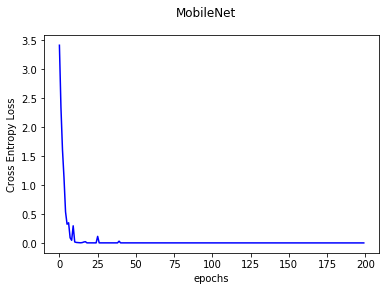

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('MobileNet', fontsize=12)
plt.plot(performance.history.get('loss'), 'b')
# plt.plot(performance.history.get('acc'), 'r')
plt.xlabel('epochs')
plt.ylabel('Cross Entropy Loss')

In [13]:
# get predictions on validation set
from tensorflow.python.keras.applications.imagenet_utils import decode_predictions
import numpy as np
pre = np.zeros(shape = (len(val_labels), num_classes))
j = 0
for j in range(0, int(len(val_labels)/5)):
    pre[j*5:j*5+5] = ff_model.predict(model.predict(val_images[j*5:j*5+5]))
# pre[j*5+5:len(pre)] = ff_model.predict(model.predict(val_images[j*5+5:len(pre)]))
    
# pre = ff_model.predict(model.predict(val_images))
result = np.zeros(len(val_labels))
gold_standard = np.zeros(len(val_labels))
for i in range(0, j*5+5):
    result[i] = np.argmax(pre[i])
for i in range(0, j*5+5):
    gold_standard[i] = np.argmax(val_labels[i])

In [14]:
confidences = []
confidence = {}
for i in range(len(pre)):
    top_3_idx = np.argsort(pre[i])[-3:]
    top_3_values = [pre[i][j] for j in top_3_idx]
    for j in range(0, 3):
        confidence[labels_category[top_3_idx[j]]] = top_3_values[j]*100
    confidences.append(confidence)
    confidence = {}

In [15]:
# test
def test(path):
    img = image.load_img(path, target_size=(224, 224))
    test = []
    x = image.img_to_array(img)
    x = preprocess_input(x)
    test.append(x)
    test = np.asarray(test)
    test.shape
    return ff_model.predict(model.predict(test))*100

In [16]:
labels = np.zeros(num_classes)
z = 0
s1 = 'Snake Species'
s2 = 'labels'
s3 = 'One Hot Labels'
print(f'{s1:20}     {s2:7}     {s3:20}')
for k in category_labels.keys():
    labels[z] = 1
#     print(k+'    '+str(category_labels[k])+'    '+str(labels))
    print(f'{k:20} ==> {str(category_labels[k]):7} ==> {str(labels):20}')
    z = z + 1
    labels = np.zeros(num_classes)

Snake Species            labels      One Hot Labels      
CarpetPython         ==> 0       ==> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CoastalTaipan        ==> 1       ==> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Cobra                ==> 2       ==> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CommonDeathAdder     ==> 3       ==> [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CommonEuropeanViper  ==> 4       ==> [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Copperhead           ==> 5       ==> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
GarterSnake          ==> 6       ==> [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
InlandTaipan         ==> 7       ==> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Keelback             ==> 8       ==> [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
MilkSnake            ==> 9       ==> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
MulgaSnake           ==> 10      ==> [0. 0

In [17]:
# from sklearn import metrics
# measure performance
correct = 0
incorrect_ind = []
incorrect_value = []
incorrect_gold_standard = []
for i in range(0, len(result)):
    if(result[i]==gold_standard[i]):
        correct = correct + 1
    else:
        incorrect_ind.append(i)
        incorrect_value.append(result[i])
        incorrect_gold_standard.append(gold_standard[i])
print(correct/len(result)*100)

40.14598540145985


In [18]:
print(float(2e-4))

0.0002


In [19]:
pre[42]

array([5.71612289e-12, 3.74685806e-05, 1.74195380e-11, 5.78854689e-08,
       1.65277392e-13, 3.17861395e-16, 9.99829531e-01, 1.22449313e-08,
       1.31705528e-04, 4.14537345e-18, 1.13667909e-06, 5.47742537e-15,
       1.31802058e-09, 1.24282434e-13, 2.99101932e-12, 2.85111621e-17,
       3.77966093e-20])

In [20]:
# misclassified images index
# print(val_ind[incorrect_ind])
mis_ind = val_ind[incorrect_ind]
for i in range(0, len(incorrect_gold_standard)):
    print('Misclassified image index: '+ str(mis_ind[i]))
    print('Wrong label: '+labels_category[incorrect_value[i]])
    print('Label should be: '+labels_category[incorrect_gold_standard[i]])
    print('Confidence of each category: '+str(confidences[incorrect_ind[i]]))
    print()

Misclassified image index: 460
Wrong label: SmallEyedSnake
Label should be: RedBelliedBlack
Confidence of each category: {'CommonDeathAdder': 2.594588366378048e-06, 'CoastalTaipan': 4.206214754276516e-06, 'SmallEyedSnake': 99.99998807907104}

Misclassified image index: 391
Wrong label: CarpetPython
Label should be: MilkSnake
Confidence of each category: {'CommonDeathAdder': 4.4290341436862946, 'Keelback': 6.223561242222786, 'CarpetPython': 81.9323718547821}

Misclassified image index: 53
Wrong label: CommonDeathAdder
Label should be: CoastalTaipan
Confidence of each category: {'MulgaSnake': 23.08899313211441, 'CoastalTaipan': 27.462923526763916, 'CommonDeathAdder': 27.899399399757385}

Misclassified image index: 285
Wrong label: TigerSnake
Label should be: InlandTaipan
Confidence of each category: {'InlandTaipan': 0.7179656531661749, 'Cobra': 2.2056439891457558, 'TigerSnake': 96.43132090568542}

Misclassified image index: 476
Wrong label: InlandTaipan
Label should be: RedBelliedBlack
C

In [21]:
val_ind

array([377, 190, 460,  92, 391,  53,  96, 285, 476, 518, 621, 599, 510,
       120, 207, 618, 312, 186, 131, 182, 525, 364, 670,  76,  16, 542,
       403, 181, 680, 622, 654,  54, 339,  15, 166,  59, 115, 651, 168,
       449, 279, 127, 269, 164, 217, 655, 660, 640, 322,  95, 157, 154,
       512,  63, 392, 278, 624, 167, 290, 458, 454,  89, 235,   3, 520,
        21, 591, 617, 375, 153, 438, 673, 389,  98, 371, 614,  65, 191,
       619, 548, 489, 429, 124,  39, 616, 259,  47, 252, 188, 175, 202,
       477, 234,  69, 209,   9, 193, 104, 447,  38, 376, 534, 134, 643,
       158,  78,  24,  99, 352, 293, 412,   1, 422, 141, 425, 420,  72,
        94, 248, 508, 667, 394, 155,  87, 304,  40, 580, 576, 208, 466,
       133, 367, 334, 147, 119, 672,  61])

In [22]:
accuracy_each_species = {}
tmp_val_labels = []
for l in val_labels:
    tmp_val_labels.append(l.tolist().index(1))
for i in range(0, num_classes):
    tmp_count_total = tmp_val_labels.count(i)
    tmp_count_incorrect = incorrect_gold_standard.count(i)
    accuracy_each_species[labels_category[i]] = 100 - tmp_count_incorrect/tmp_count_total*100
accuracy_each_species

{'CarpetPython': 66.66666666666667,
 'CoastalTaipan': 41.666666666666664,
 'Cobra': 45.45454545454546,
 'CommonDeathAdder': 30.769230769230774,
 'CommonEuropeanViper': 41.666666666666664,
 'Copperhead': 42.85714285714286,
 'GarterSnake': 100.0,
 'InlandTaipan': 60.0,
 'Keelback': 25.0,
 'MilkSnake': 30.0,
 'MulgaSnake': 42.85714285714286,
 'RedBelliedBlack': 25.0,
 'RoughScaledSnake': 50.0,
 'SmallEyedSnake': 25.0,
 'SpottedPython': 25.0,
 'TigerSnake': 22.222222222222214,
 'TreeSnake': 20.0}

Text(0, 0.5, 'accuracy')

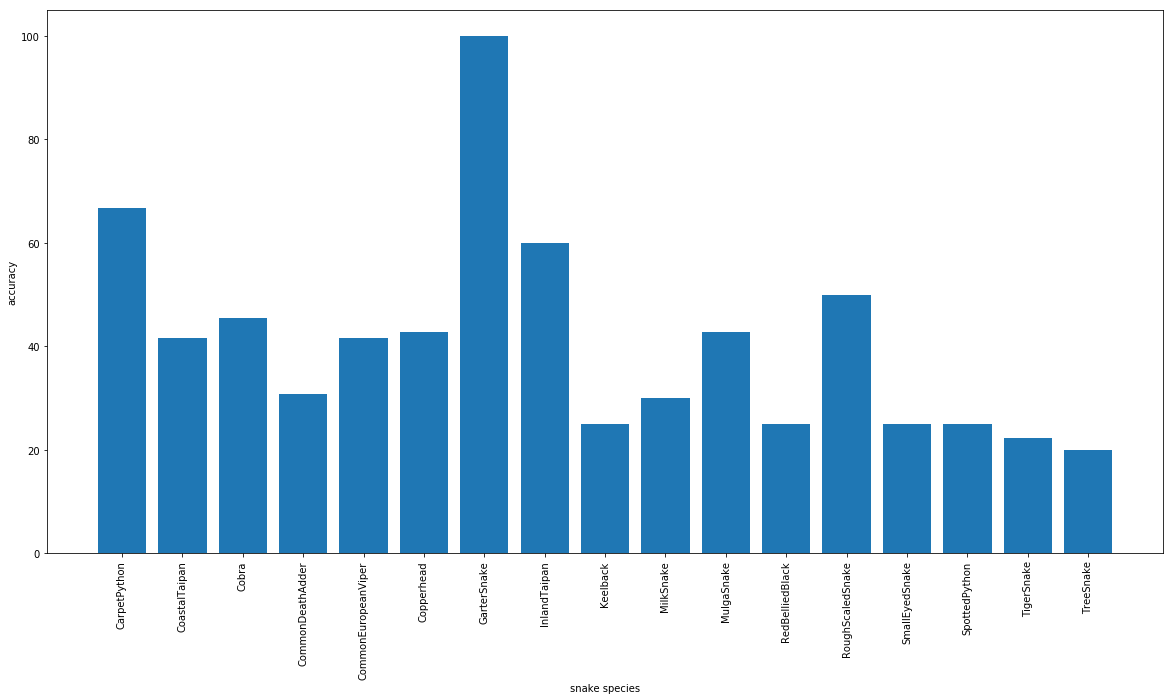

In [23]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.bar(accuracy_each_species.keys(), accuracy_each_species.values(), width=0.8)
plt.xlabel('snake species')
plt.ylabel('accuracy')
# plt.savefig('D:\mymajor\COMP90055ComputingProject\ReportMaterial\\result_accuracy_each_species.PNG')

In [24]:
confidences[incorrect_ind[0]]

{'CommonDeathAdder': 2.594588366378048e-06,
 'CoastalTaipan': 4.206214754276516e-06,
 'SmallEyedSnake': 99.99998807907104}

In [25]:
result

array([ 9.,  4., 13.,  2.,  0.,  3.,  2., 15.,  7., 12., 13., 14.,  8.,
        3.,  5., 10.,  7.,  8.,  7.,  7., 15.,  0., 16., 13.,  0., 13.,
        7.,  4.,  3., 15., 11.,  3., 15.,  0.,  4.,  7.,  8., 11.,  4.,
       11.,  6., 15.,  6.,  8.,  5., 15.,  7., 15.,  8.,  7.,  1.,  3.,
       12., 10.,  0.,  6.,  8.,  4.,  2.,  1.,  1.,  8.,  8.,  0.,  8.,
        0.,  8.,  0.,  0.,  1.,  7., 12.,  1.,  2.,  9.,  3.,  1.,  8.,
       10.,  2., 12.,  1.,  3., 12.,  1.,  6., 12.,  6.,  7.,  0.,  5.,
       11., 14.,  1., 15.,  0.,  8.,  2., 15.,  8.,  0., 10.,  8., 15.,
       15.,  1.,  2., 11.,  3.,  7., 10.,  0., 10., 12., 10.,  8., 10.,
       11.,  6.,  8.,  8.,  9.,  8., 11.,  7.,  1.,  6.,  8., 13., 15.,
        3., 14., 15., 12.,  2.,  0.,  0.])

In [26]:
gold_standard

array([ 9.,  4., 11.,  2.,  9.,  1.,  2.,  7., 11., 12., 15., 14., 12.,
        3.,  5., 15.,  7.,  4.,  3.,  4., 13.,  9., 16.,  1.,  0., 13.,
       10.,  4., 16., 15., 16.,  1.,  8.,  0.,  4.,  1.,  2., 16.,  4.,
       11.,  6.,  3.,  6.,  4.,  5., 16., 16., 15.,  8.,  2.,  3.,  3.,
       12.,  1.,  9.,  6., 15.,  4.,  7., 11., 11.,  2.,  5.,  0., 12.,
        0., 14., 15.,  9.,  3., 10., 16.,  9.,  2.,  9., 15.,  1.,  4.,
       15., 13., 12., 10.,  3.,  0., 15.,  6.,  1.,  6.,  4.,  4.,  5.,
       11.,  5.,  1.,  5.,  0.,  4.,  2., 11.,  0.,  9., 13.,  3., 16.,
        3.,  1.,  0.,  2.,  8.,  7., 10.,  0., 10.,  3., 10., 10.,  1.,
        2.,  6., 12., 16.,  9.,  3.,  2.,  7.,  1., 14., 14.,  5., 11.,
        3.,  9.,  8.,  3.,  2.,  0.,  0.])

In [27]:
# model.save('TrainedModel/MyCNN_VGG_Model17.h5')
# ff_model.save('TrainedModel/MyFF_VGG_Model17.h5')

In [28]:
# load pre-trained model
# model = load_model('TrainedModel/MyCNN_RESNET50_Model17.h5')
# ff_model = load_model('TrainedModel/MyFF_RESNET50_Model17.h5')


In [29]:
# test
label = test('1.jpg')
print(label[0])

[7.0201000e-03 8.3617437e-05 5.9643257e-01 2.4752651e-05 1.2387311e-07
 1.7097660e-08 1.7970055e-07 2.9029211e-02 1.7261821e-01 8.4216722e-08
 9.1526272e-05 1.2770065e-03 4.4828309e-07 3.8362225e-09 9.9193405e+01
 7.6621945e-06 8.6436719e-10]


In [30]:
category_labels

{'CarpetPython': 0,
 'CoastalTaipan': 1,
 'Cobra': 2,
 'CommonDeathAdder': 3,
 'CommonEuropeanViper': 4,
 'Copperhead': 5,
 'GarterSnake': 6,
 'InlandTaipan': 7,
 'Keelback': 8,
 'MilkSnake': 9,
 'MulgaSnake': 10,
 'RedBelliedBlack': 11,
 'RoughScaledSnake': 12,
 'SmallEyedSnake': 13,
 'SpottedPython': 14,
 'TigerSnake': 15,
 'TreeSnake': 16}

In [31]:
class SnakeImage:
    def __init__(self, path):
        stat = test(path)
        self.most_likely_species = labels_category[np.argmax(stat)]
        
        self.confidence = {}
        top_3_idx = np.argsort(stat[0])[-3:]
        top_3_values = [stat[0][j] for j in top_3_idx]
        for j in range(0, 3):
            self.confidence[labels_category[top_3_idx[j]]] = top_3_values[j]*100
            
        with open('Descriptions/'+self.most_likely_species+'.txt') as f:
            self.habitat = f.readline()
            self.scale = f.readline()
            self.is_venemous = f.readline()
        
# obj = SnakeImage('1.jpg')

(50, 100)

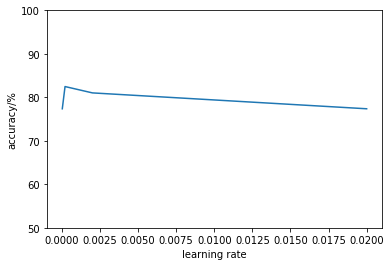

In [32]:
lr = [0.00002, 0.0002, 0.002, 0.02]
acc = [77.37, 82.48, 81.02, 77.37]
plt.plot(lr, acc)
plt.xlabel('learning rate')
plt.ylabel('accuracy/%')
plt.ylim(50, 100)